In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geodatasets as godt
import geopandas as gop

In [350]:
df = pd.read_csv('data.csv', delimiter=';', encoding='utf-8')

In [351]:
print(df.dtypes)

operateur                          object
annee                               int64
filiere                            object
code_categorie_consommation        object
libelle_categorie_consommation     object
code_grand_secteur                 object
libelle_grand_secteur              object
code_naf                          float64
libelle_secteur_naf2               object
conso                             float64
pdl                                 int64
indqual                           float64
nombre_mailles_secretisees          int64
code_region                        object
libelle_region                     object
dtype: object


In [352]:
todrop = ['operateur', 'nombre_mailles_secretisees', 'code_grand_secteur', 'code_naf']
df.drop(columns=todrop, axis=1, inplace=True)

In [353]:
print(df.isna().sum())

annee                             0
filiere                           0
code_categorie_consommation       0
libelle_categorie_consommation    0
libelle_grand_secteur             0
libelle_secteur_naf2              0
conso                             0
pdl                               0
indqual                           0
code_region                       0
libelle_region                    0
dtype: int64


In [355]:
print(df.dtypes)

annee                               int64
filiere                            object
code_categorie_consommation        object
libelle_categorie_consommation     object
libelle_grand_secteur              object
libelle_secteur_naf2               object
conso                             float64
pdl                                 int64
indqual                           float64
code_region                        object
libelle_region                     object
dtype: object


In [356]:

df = df[df['libelle_categorie_consommation'] != "0"]


## What to do:
- Comparer 2021 et 2018 (post et pré covid):
    - Filère (laquelle la plus utilisée ?)
    - Map geopandas (CA MARCHE PAS)
    - Indqual
    - Conso elec et gaz par région (avec Geopandas si ça marche?)
    - Etude résidentiel vs entreprise sur l'élec et le gaz -> qui consomme le plus et de quoi ?
    - Entreprise et région
    - Résidentiel et région


# REPARTITION CONSOMMATEUR

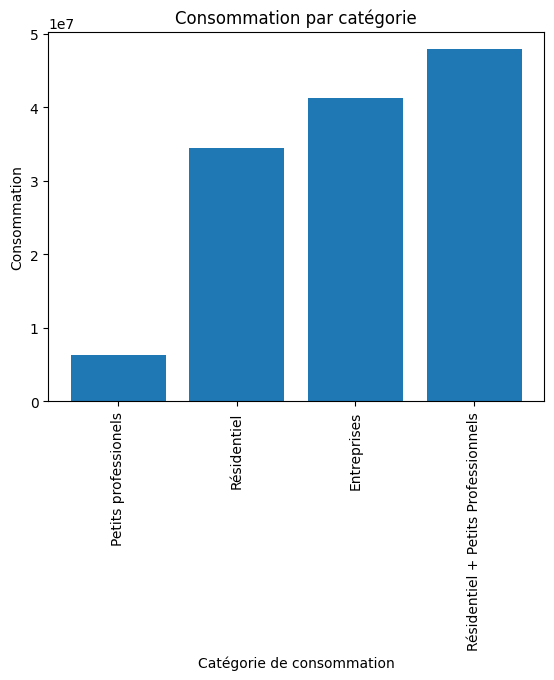

In [358]:
plt.bar(df['libelle_categorie_consommation'], df['conso'])
plt.xlabel('Catégorie de consommation')
plt.ylabel('Consommation')
plt.title('Consommation par catégorie')
plt.xticks(rotation=90)
plt.show()

## Repartion conso 2021 vs 2018

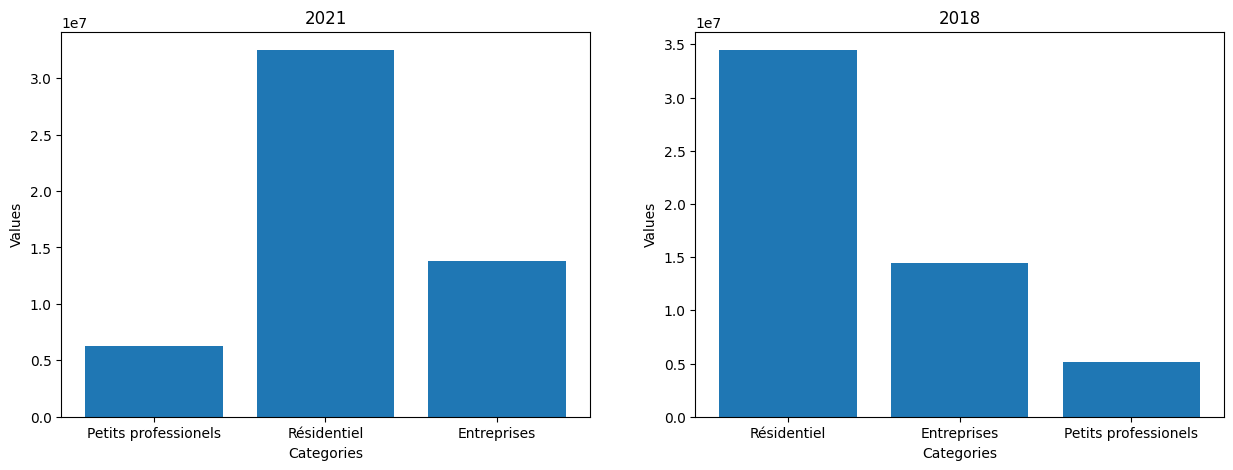

In [376]:
df2021 = df[df['annee'] == 2021]
df2018 = df[df['annee'] == 2018]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for 2021
axes[0].bar(df2021['libelle_categorie_consommation'], df2021['conso'])
axes[0].set_title('2021')

# Bar plot for 2018
axes[1].bar(df2018['libelle_categorie_consommation'], df2018['conso'])
axes[1].set_title('2018')

# Set common labels
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Values')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Values')
# Show the plots
plt.show()

# MAP FRANCE (INTRO)

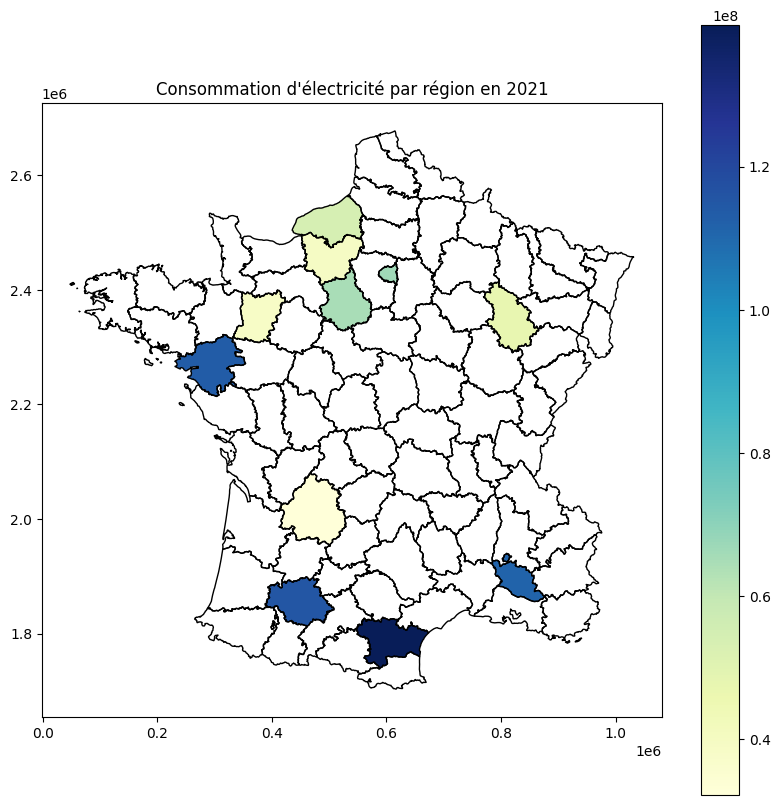

In [369]:
france = gop.read_file(godt.get_path("geoda.guerry"))
grouped_data = df2021.groupby('code_region')['conso'].sum().reset_index()
france['dept'] = france['dept'].astype(str)
france['dept'] = france['dept'].str.replace('.0', '')
merged_data = france.merge(grouped_data, left_on="dept", right_on="code_region")
merged_data = france.merge(grouped_data, left_on="dept", right_on="code_region")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title("Consommation d'électricité par région en 2021")
france.boundary.plot(ax=ax, linewidth=1, color="black")
merged_data.plot(column="conso", cmap="YlGnBu", linewidth=0.8, ax=ax, legend=True)
plt.show()

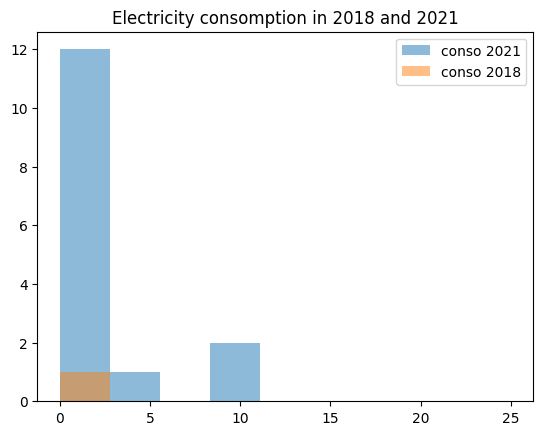

In [360]:
df2021 = df[(df['annee'] == 2021) & (df['filiere'] == 'Gaz')]
df2018 = df[(df['annee'] == 2018) & (df['filiere'] == 'Gaz')]
x = df2021['conso']
y = df2018['conso']
bins = np.linspace(0, 25, 10)

plt.hist(x, bins, alpha=0.5, label='conso 2021')
plt.hist(y, bins, alpha=0.5, label='conso 2018')
plt.legend(loc='upper right')
plt.title('Electricity consomption in 2018 and 2021')
plt.show()

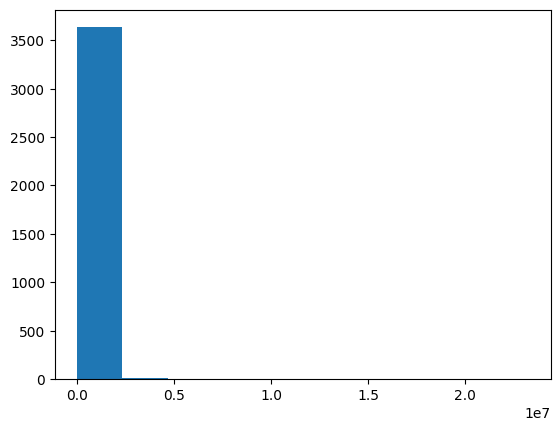

In [361]:
df2021 = df[(df['annee'] == 2021) & (df['filiere'] == 'Electricité')]
plt.hist(df2021['conso'], bins=10, label='conso 2021')
plt.show()